# **Análisis de resultados - Prolog 2023**

## **Librerías**

In [1]:
#%pip install pandas matplotlib seaborn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Directorios**

In [3]:
ALL_TEST_RESULTS = 'all_test_results.csv'
SUMMARY_PER_SEED_STRATEGY_LEVEL = 'summary_per_seed_strategy_level.csv'
SUMMARY_PER_STRATEGY = 'summary_per_strategy.csv'

## **Análisis de resultados**

In [4]:
all_results_df = pd.read_csv(ALL_TEST_RESULTS)
summary_per_seed_strategy_level_df = pd.read_csv(SUMMARY_PER_SEED_STRATEGY_LEVEL)
summary_per_strategy_df = pd.read_csv(SUMMARY_PER_STRATEGY)

In [5]:
all_results_df.head()

,strategy,seed,depth,final_score,cant_mov,won,lost_with_1024,max_val,time,final_grid
0,random,265,-,424,67,0,0,32,0.010,"m(f(2,8,2,8),f(16,32,8,16),f(4,16,32,2),f(2,4,..."
1,random,265,-,1340,129,0,0,128,0.019,"m(f(4,2,8,4),f(16,64,2,32),f(2,32,128,8),f(4,2..."
2,random,265,-,1008,116,0,0,64,0.013,"m(f(8,32,64,2),f(16,2,16,8),f(4,64,32,16),f(2,..."
3,random,265,-,828,93,0,0,64,0.005,"m(f(2,64,4,2),f(8,4,32,4),f(16,2,64,8),f(4,8,1..."
4,random,265,-,1156,112,0,0,128,0.007,"m(f(2,8,4,2),f(16,2,64,8),f(4,16,8,4),f(2,128,..."


In [6]:
summary_per_seed_strategy_level_df.head()

,strategy,seed,iterations,depth,score_avg,cant_mov_avg,win_rate,lost_with_1024_rate,time_avg
0,random,265,100,-,989.56,103.20,0.0,0.0,0.00578
1,random,385,100,-,986.48,103.40,0.0,0.0,0.00648
2,random,550,100,-,936.80,100.26,0.0,0.0,0.00437
3,random,239,100,-,1034.96,107.36,0.0,0.0,0.00563
4,random,748,100,-,998.64,105.16,0.0,0.0,0.00564


In [7]:
summary_per_strategy_df.head()

,strategy,cant_seeds,iterations_per_seed,depth,score_avg,cant_mov_avg,win_rate_avg,win_rate_variance,lost_with_1024_rate_avg,time_avg
0,random,10,100,-,989.372,104.078,0.000,0.000000,0.000000,0.005962
1,dummy,10,100,-,3026.756,238.118,0.000,0.000000,0.003000,0.014284
2,minimax,10,100,3,16139.784,813.532,0.410,0.001110,0.808000,6.563000
3,minimax,10,100,2,12390.572,697.783,0.094,0.001271,0.557649,0.983165
4,minimax,10,100,1,6799.848,444.878,0.004,0.000027,0.122465,0.099461


Separar modelos de distinta profundidad como si fueran distintos.

In [8]:
list(summary_per_seed_strategy_level_df['strategy'].unique())

['random', 'dummy', 'minimax']

In [9]:
possible_depths = [str(i) for i in range(1, 4)]

for df in [all_results_df, summary_per_seed_strategy_level_df, summary_per_strategy_df]:
    for index, row in df.iterrows():
        if row['depth'] in possible_depths:
            df.loc[index, 'strategy'] = row['strategy'] + '_d' + str(row['depth'])

## **Comparación gráfica de estrategias**

In [10]:
def barplot(df, x, y, title, scale='log', xlabel=None, ylabel=None, save_dir=None):
    sns.set(style="whitegrid")
    sns.set(rc={'figure.figsize':(10, 5)})
    ax = sns.barplot(x=x, y=y, data=df, errorbar=None)
    ax.set_title(title)
    ax.set_yscale(scale)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
    if save_dir:
        plt.savefig(save_dir)
    plt.show()

def plot_time_by_strategy(df, title):
    barplot(df, 'strategy', 'time_avg', title, scale='log', xlabel='Strategy', ylabel='Time (s)', save_dir='time_by_strategy.png')

def plot_winrate_by_strategy(df, title):
    barplot(df, 'strategy', 'win_rate', title, scale='linear', xlabel='Strategy', ylabel='Winrate', save_dir='winrate_by_strategy.png')

def plot_score_by_strategy(df, title):
    barplot(df, 'strategy', 'final_score', title, scale='log', xlabel='Strategy', ylabel='Score', save_dir='score_by_strategy.png')

def score_distribution_by_strategy(df, title):
    sns.set(style="darkgrid")
    sns.set(rc={'figure.figsize':(11.7,10)})
    ax = sns.displot(df, x="final_score", hue="strategy", kind="kde", fill=True)
    ax.set_ylabels("Count")
    ax.set_xlabels("Score")
    plt.title(title)
    plt.savefig('score_distribution_by_strategy.png')
    plt.show()

def plot_max_values(df, title):
    sns.set(style='darkgrid')
    plt.figure(figsize=(8, 6))
    sns.barplot(x='max_val', y='strategy', data=df, errorbar=None)
    sns.color_palette("rocket", as_cmap=True)
    plt.xlabel('Max Values')
    plt.ylabel('Estrategias')
    plt.title(title)
    plt.savefig('max_values.png')
    plt.show()


In [11]:
summary_per_strategy_df['win_rate_avg']

0    0.000
1    0.000
2    0.410
3    0.094
4    0.004
Name: win_rate_avg, dtype: float64

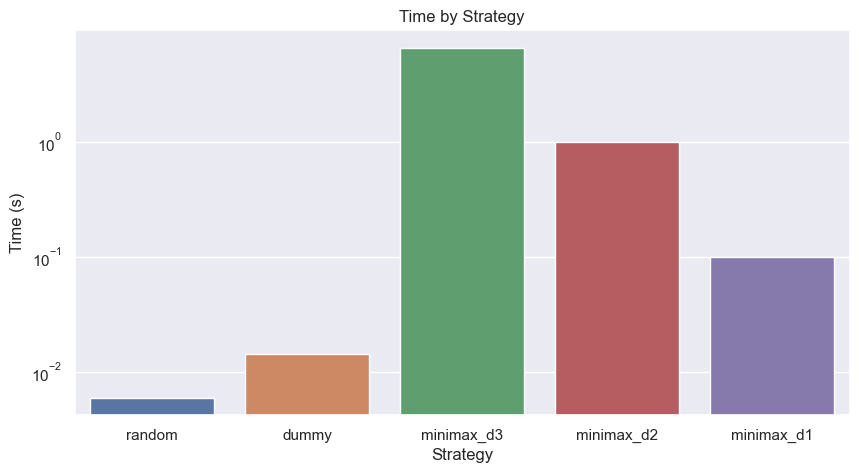

In [12]:
plot_time_by_strategy(summary_per_strategy_df, "Time by Strategy")

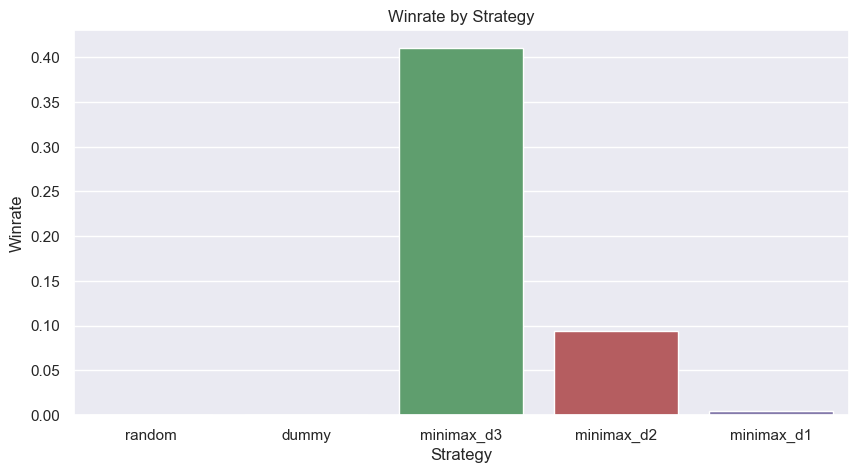

In [13]:
plot_winrate_by_strategy(summary_per_seed_strategy_level_df, "Winrate by Strategy")

In [14]:
all_results_df.groupby('strategy')['max_val'].describe()

,count,mean,std,min,25%,50%,75%,max
strategy,,,,,,,,
dummy,1000.0,242.752,132.124166,32.0,128.0,256.0,256.0,1024.0
minimax_d1,1000.0,493.056,254.009349,128.0,256.0,512.0,512.0,2048.0
minimax_d2,1000.0,902.528,455.886409,128.0,512.0,1024.0,1024.0,2048.0
minimax_d3,1000.0,1383.552,577.716764,128.0,1024.0,1024.0,2048.0,2048.0
random,1000.0,100.448,51.987133,16.0,64.0,64.0,128.0,256.0


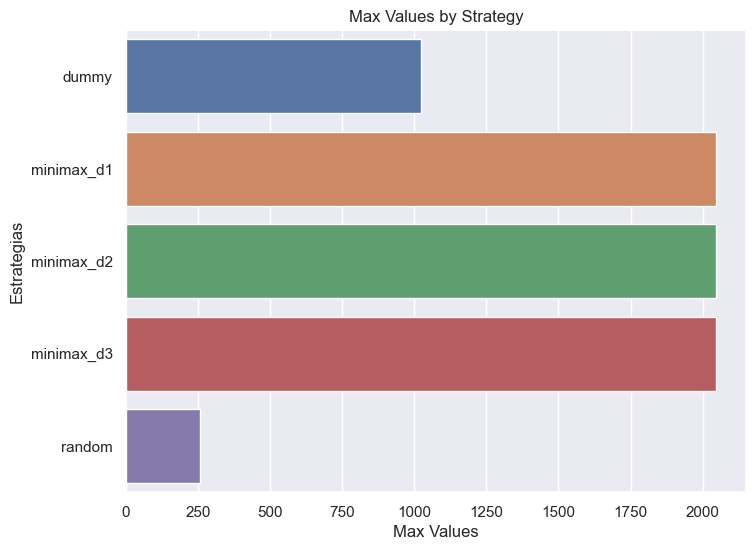

In [15]:
plot_max_values(all_results_df.groupby('strategy').max().reset_index(), "Max Values by Strategy")


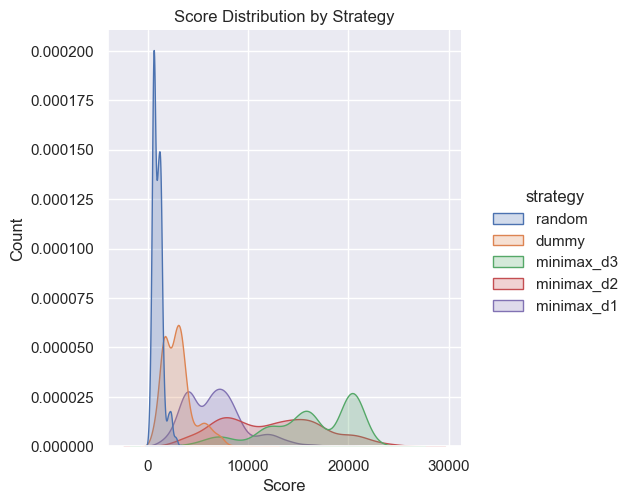

In [16]:
score_distribution_by_strategy(all_results_df, "Score Distribution by Strategy")